In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam




In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size = 1/6, random_state=42)

print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_val.shape =', x_val.shape)
print('y_val.shape =', y_val.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)

x_train.shape = (50000, 28, 28, 1)
y_train.shape = (50000,)
x_val.shape = (10000, 28, 28, 1)
y_val.shape = (10000,)
x_test.shape = (10000, 28, 28, 1)
y_test.shape = (10000,)


In [3]:
import tensorflow.keras
from tensorflow.keras.layers import Activation

def make_conv_model():
    model = Sequential()

    model.add(Conv2D(filters = 10, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 10, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation = "softmax"))
    optimizer = tensorflow.keras.optimizers.Adam()

    model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) 
    return model

def make_dense_model():
    model = Sequential()
    model.add(Flatten(input_shape = (28,28,1)))
    model.add(Dense(512, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation = "softmax"))
    optimizer = tensorflow.keras.optimizers.Adam()

    model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) 
    return model

simple_conv_model = make_conv_model()
dense_model = make_dense_model()
simple_conv_model.summary()
dense_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        260       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 10)        2510      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                125504    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [4]:
epochs = 40
batch_size = 86

simple_conv_history = simple_conv_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=0)
dense_history = dense_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val),verbose=0)

In [5]:
import matplotlib.pyplot as plt

313/313 [==============================] - 0s 1ms/step - loss: 0.1163 - accuracy: 0.9816


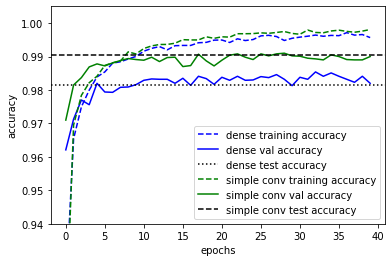

In [6]:
simple_conv_test_loss, simple_conv_test_acc = simple_conv_model.evaluate(x_test, y_test)
dense_test_loss, dense_test_acc = dense_model.evaluate(x_test, y_test)

plt.plot(dense_history.history["accuracy"], "b--",label="dense training accuracy")
plt.plot(dense_history.history["val_accuracy"], "b-",label="dense val accuracy")
plt.axhline(dense_test_acc, color="k", linestyle=":", label="dense test accuracy")
plt.plot(simple_conv_history.history["accuracy"], "g--",label="simple conv training accuracy")
plt.plot(simple_conv_history.history["val_accuracy"], "g-",label="simple conv val accuracy")
plt.axhline(simple_conv_test_acc,color="k", linestyle="--", label="simple conv test accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.94, 1.005)
plt.legend()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally 
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train.reshape(-1,28,28,1))

In [9]:
simple_conv_model = make_conv_model()

epochs = 40
batch_size = 86
simple_conv_aug_history = simple_conv_model.fit(
    datagen.flow(x_train,y_train, batch_size=batch_size),
    epochs = epochs, validation_data = (x_val,y_val),
    steps_per_epoch=x_train.shape[0]//batch_size, verbose=0)

313/313 [==============================] - 1s 2ms/step - loss: 0.0212 - accuracy: 0.9932


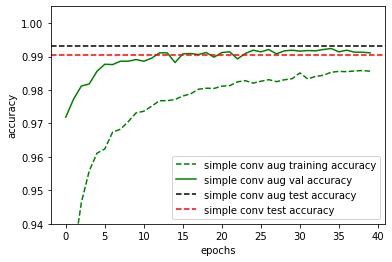

In [10]:
simple_conv_aug_test_loss, simple_conv_aug_test_acc = simple_conv_model.evaluate(x_test, y_test)


plt.plot(simple_conv_aug_history.history["accuracy"], "g--",label="simple conv aug training accuracy")
plt.plot(simple_conv_aug_history.history["val_accuracy"], "g-",label="simple conv aug val accuracy")
plt.axhline(simple_conv_aug_test_acc,color="k", linestyle="--", label="simple conv aug test accuracy")
plt.axhline(simple_conv_test_acc,color="r", linestyle="--", label="simple conv test accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.94, 1.005)
plt.legend()

In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [12]:
epochs = 30
batch_size = 86

simple_conv_model = make_conv_model()

simple_conv_aug_lr_history = simple_conv_model.fit(
    datagen.flow(x_train,y_train, batch_size=batch_size),
    epochs = epochs, validation_data = (x_val,y_val),
    steps_per_epoch=x_train.shape[0]//batch_size, 
    callbacks=[learning_rate_reduction],
    verbose=0)


Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00030: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.


313/313 [==============================] - 1s 2ms/step - loss: 0.0212 - accuracy: 0.9933


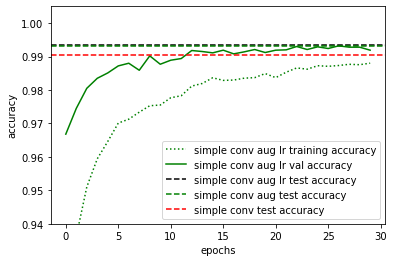

In [13]:
simple_conv_aug_lr_test_loss, simple_conv_aug_lr_test_acc = simple_conv_model.evaluate(x_test, y_test)


plt.plot(simple_conv_aug_lr_history.history["accuracy"], "g:",label="simple conv aug lr training accuracy")
plt.plot(simple_conv_aug_lr_history.history["val_accuracy"], "g-",label="simple conv aug lr val accuracy")
plt.axhline(simple_conv_aug_lr_test_acc,color="k", linestyle="--", label="simple conv aug lr test accuracy")
plt.axhline(simple_conv_aug_test_acc,color="g", linestyle="--", label="simple conv aug test accuracy")
plt.axhline(simple_conv_test_acc,color="r", linestyle="--", label="simple conv test accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.94, 1.005)
plt.legend()

In [14]:
# Create an ensemble of models
models = [make_conv_model() for i in range(5)]


epochs = 30
batch_size = 86

# Fit the model
history = [model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                    epochs = epochs, validation_data = (x_val,y_val),
                    steps_per_epoch=x_train.shape[0]//batch_size,
                    callbacks=[learning_rate_reduction], verbose=0
                   ) for model in models]

for i, model in enumerate(models):
  print("model", i, "loss and accuracy:", model.evaluate(x_test, y_test))


Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00030: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00021: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00024: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00027: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00021: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00027: ReduceLROnPlate

In [15]:
import tensorflow.keras
x = tensorflow.keras.layers.Input(shape=(28,28,1))
yi = [model(x) for model in models]
y = tensorflow.keras.layers.Average()(yi)
Committee = tensorflow.keras.models.Model(inputs=x, outputs=y)
Committee.compile(optimizer=tensorflow.keras.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) 

committee_conv_loss, committee_conv_acc = Committee.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0150 - accuracy: 0.9951


In [16]:
import tensorflow.keras

def make_deep_conv_model():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation = "softmax"))


  # optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    optimizer = tensorflow.keras.optimizers.Adam()

    model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) 
    return model


# Create an ensemble of models
deep_models = [make_deep_conv_model() for i in range(5)]


epochs = 30
batch_size = 86

# Fit the model
history = [model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                    epochs = epochs, validation_data = (x_val,y_val),
                    steps_per_epoch=x_train.shape[0]//batch_size,
                    callbacks=[learning_rate_reduction], verbose=0
                   ) for model in deep_models]

for i, model in enumerate(deep_models):
    print("model", i, "loss and accuracy:", model.evaluate(x_test, y_test))





Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00023: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00029: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00023: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00029: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00018: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00024: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00027: ReduceLROnPlateau

In [17]:
import tensorflow.keras

x = tensorflow.keras.layers.Input(shape=(28,28,1))
yi = [model(x) for model in deep_models]
y = tensorflow.keras.layers.Average()(yi)
deep_Committee = tensorflow.keras.models.Model(inputs=x, outputs=y)
deep_Committee.compile(optimizer=tensorflow.keras.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) 

deep_committee_conv_loss, deep_committee_conv_acc = deep_Committee.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0078 - accuracy: 0.9970
